## How to Approach Machine Learning Projects

![](https://i.imgur.com/kKdAALX.png)

In this tutorial, we'll explore a step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings. 

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

### Downloading Data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets 
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data. 


### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 

For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


Using date information, we can also create new current columns like: 

1. Weather on each day
2. Whether the date was a public holiday
3. Whether the store was running a promotion on that day.



## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range. 

Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

Finally, let's encode categorical columns as one-hot vectors.

Explore the `scikit-learn` preprocessing module: https://scikit-learn.org/stable/modules/preprocessing.html

## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

Let's evaluate this to using the RMSE score.

from sklearn.metrics import mean_squared_error

### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

`model.fit` uses the following workflow for training the model ([Source: From Basic Machine Learning to Deep Learning in 5 Minutes](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

Based on the above baselines, we now know that any model we train should have ideally have a RMSE score lower than $2800. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense. 

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">

### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html

from sklearn.linear_model import LinearRegression, Ridge(L2 Regularization), Lasso(L1 Regularization), ElasticNet, SGDRegressor


### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

### Other Supervised Learning Models

See https://scikit-learn.org/stable/supervised_learning.html

Try some other supervised learning algorithms and see if you can get a better result.

### Unsupervised Learning Techniques

See https://scikit-learn.org/stable/unsupervised_learning.html (not applicable for this problem)


## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

### K-Fold Cross Validation

- Apply K fold cross validation for the random forest regressor trained earlier.

Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">

Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)): 

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/


## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

rf.feature_importances_

importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

### Model Deployment

At this point, the model can be handed over to a software developer / ML engineer who can put the model into production, as part of an existing software system. It's important to monitor the results of the model, and make improvements from time to time.

Check out this tutorial on how to deploy a model to the Heroku platform using the Flask framework: https://towardsdatascience.com/create-an-api-to-deploy-machine-learning-models-using-flask-and-heroku-67a011800c50

### Problem Statement

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.

With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

### Loading Datasets

- We are working with Rossman Dataset

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Data fields

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import pandas as pd

store_data = pd.read_csv("store.csv")
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [2]:
train_data = pd.read_csv("train.csv")
train_data.head(5)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20376\1925426325.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
test_data = pd.read_csv("test.csv")
test_data = test_data.drop(columns= "Id")
test_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-09-17,1.0,1,0,0
1,3,4,2015-09-17,1.0,1,0,0
2,7,4,2015-09-17,1.0,1,0,0
3,8,4,2015-09-17,1.0,1,0,0
4,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,1.0,0,0,0
41084,1112,6,2015-08-01,1.0,0,0,0
41085,1113,6,2015-08-01,1.0,0,0,0
41086,1114,6,2015-08-01,1.0,0,0,0


We can merge the two data frames to get a richer set of features for each row of the training set. 

In [4]:
merged_train_data = train_data.merge(store_data, how = "left", on="Store")
merged_train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Let's do for test dataset also.

In [5]:
merged_test_data = test_data.merge(store_data, how= 'left', on= "Store")
merged_test_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Exploratory Data Analysis and Visualization

### 1. Cleaning Data

The first step is to check the column data types and identify if there are any null values. Or any Duplicate values.

Missing data includes None, NaN, Null . When we are dealing with missing values using Pandas, we don’t need to differentiate them because Pandas use NaN internally for simplicity. However, it’s better to have a deeper understanding of it.

* NaN: Not a Number
NaN is a missing floating-point value, a special value that is part of the IEEE floating-point specification.

* None: A Python Object
None is a Python Object called NoneType.

* Null: Python uses None in place of null
Null is a value which you can use when you yourself want assign a empty value to a variable.

In [6]:
# It displays a summary of the dataset, including the number of rows and columns, 
# the column names, and the data types of each column.
merged_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

It appears that there are many null values almost 50% data are numm in some columns.

Understanding these categories will give you with some insights into how to approach the missing value(s) in your dataset.

Among the categories are:

- Missing Completely at Random (MCAR).: You cannot predict whether the value was missing due to specific circumstances or not.
- Missing at Random (MAR).: Data are missing at random but not completely missing. 
- Not Missing at Random (NMAR).: D ata that are not missing at random and are also known as ignorable data. 

Methods to deal with null values are: 

1. Deleting the Missing Values.
2. Imputing the 3M's i.e. Mean, Median or Mode in place of Missing Values .
3. Imputing the Missing Values for Categorical Features.
4. Imputing the Missing Values using Sci-kit Learn Library.
5. Using “Missingness” as a Feature. 

In [7]:
# rounding the values in the transposed summary statistics of the `merged_train_data` DataFrame to two decimal places.
round(merged_train_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


These ranges seems reasonable as there is no abnormality in dataset. 

- For example, we can see our min sales is 0, hence we have positive sales, as there are no negative values. So no negative sales. Which is good.

- But, as a DA or DS we have to look on each aspects carefully, as what are the reason that there is -ve sale on a particular day maybe there was a huge recall of particular kind of product you were selling because of some issue or side effect. Everyone was facing it that why they came to return it or replace the product and no sales were made. 

- Point is there can be any reason it either depends on the sales man perspective or insights and your domain knowledge. 

- Most importantly if this is the case then you have to exclude that data because that is not the represenatative of what happens on a general day to day basis. So this can cause bias in the dataset.

- Thirdly, 0 is an interesting value that why there is 0 zero on a particular day, maybe because the store is not open on those days due to hoildays. This depends on the stakeholders that do we need to include this zero sales in the model or handle as a special case. Because it seems that it is total waste of time and gpu when "Open" = 0 and "Sales" = 0.

In [8]:
# Checking duplicate data

print("There are", merged_train_data.duplicated().sum(), "duplicated data.")

There are 0 duplicated data.


Removing or keeping dupllicate data solely depends on problem statement and stakeholders.

In [9]:
# parsing the date column

merged_train_data["Date"] = pd.to_datetime(merged_train_data.Date)

In [10]:
merged_train_data.Date.min(), merged_train_data.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [11]:
# Similarly for test dataset

merged_test_data["Date"] = pd.to_datetime(merged_test_data.Date)
merged_test_data.Date.min(), merged_test_data.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

Conclusion made are:

- We are working with correct data as we are training are model based on datasets of 2013 and 2015(july) whereas the test will be done on future data i.e. data of 2015 (aug-sept).

- We are testing on a dataset of only a month and half, which cannot be a good predictor of the model's performance in the real world. According to me test should be perdorm on atleast a year of data for better modeling of data.

- Or you can just go and discuss to your manager about the shortage of dataset and its right distribution/split of testa and test or that what if we only make a model that predict the output of one and the half month and this will go for a year. And once we have a year data we can build another model to make predictions of the year data.

To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions). 

In [12]:
merged_train_data = merged_train_data[merged_train_data.Open == 1].copy()

In [13]:
merged_train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Gather insights about the problem and the dataset
- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Baiscally, Come up with ideas for preprocessing and feature engineering

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Sales Distribution

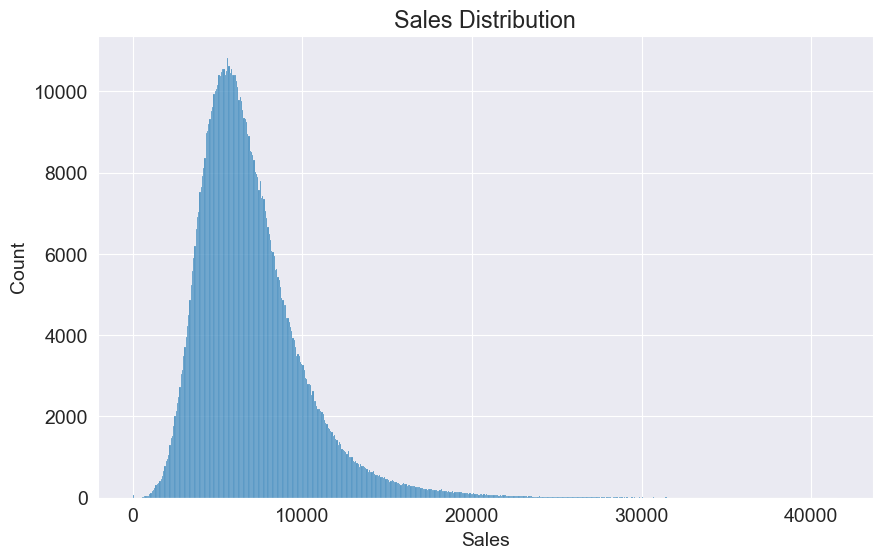

In [15]:
sns.histplot(data=merged_train_data, x = "Sales")
plt.title("Sales Distribution")
plt.show()

Conclusions made are:

- We get a fairly smooth gussian curve after excluding 0 from data.
- This graph suggests that 40% of are sales are under \$10K that is contribute by many customers.

- But as the sales increases our number of customers decreases. This is fair because we generally have 10-20% of elite customers if we are dealing with all types of products

In [16]:
# We can find the columns that are correlated to "Sales" - Target column

merged_train_data.corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

##### Sales Vs Customers

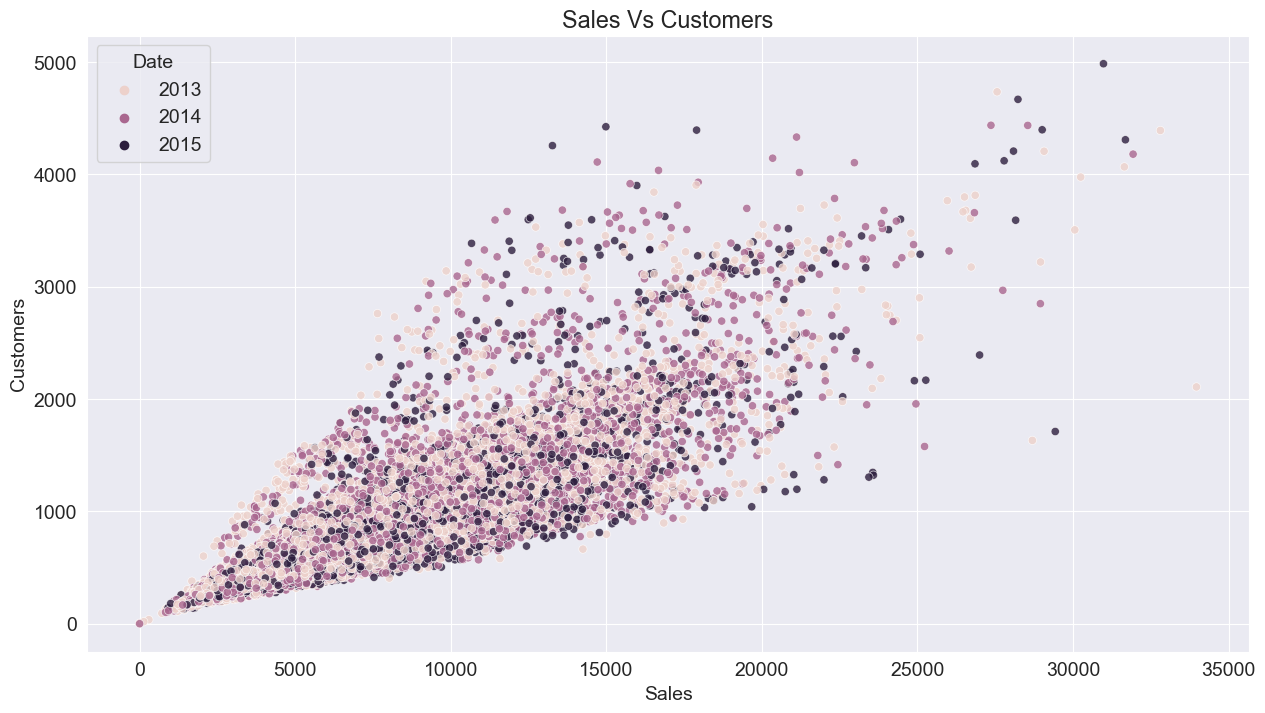

In [17]:
plt.figure(figsize=(15,8))
temp_df = merged_train_data.sample(50000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

Conclusions made are:

- There is a positive correlation between sales and customers. This means that as the number of customers increases, sales also increase. Also, from Scatter plot it is clear that the 2K customers are responsible for large chunk of sales from approximately \$5k to \$15k.

- As there is a strong correlation between more customers more sales. Obviously not necessarily always true because sometimes even few customers spend more. There are a few outliers in the data. These outliers are data points that do not follow the general trend of the data. The two outliers in this graph are from 2015 and have the highest sales and the most customers.

- But certainly we cannot take this column into consideration for model building because it is inevitable to know or predict how many customers can come in a day. It is important to consider the reasons for the outliers when making decisions about sales and marketing. For example, the outliers in this graph could be due to a one-time event, such as a special promotion or the launch of a new product.

##### Sales Per Store

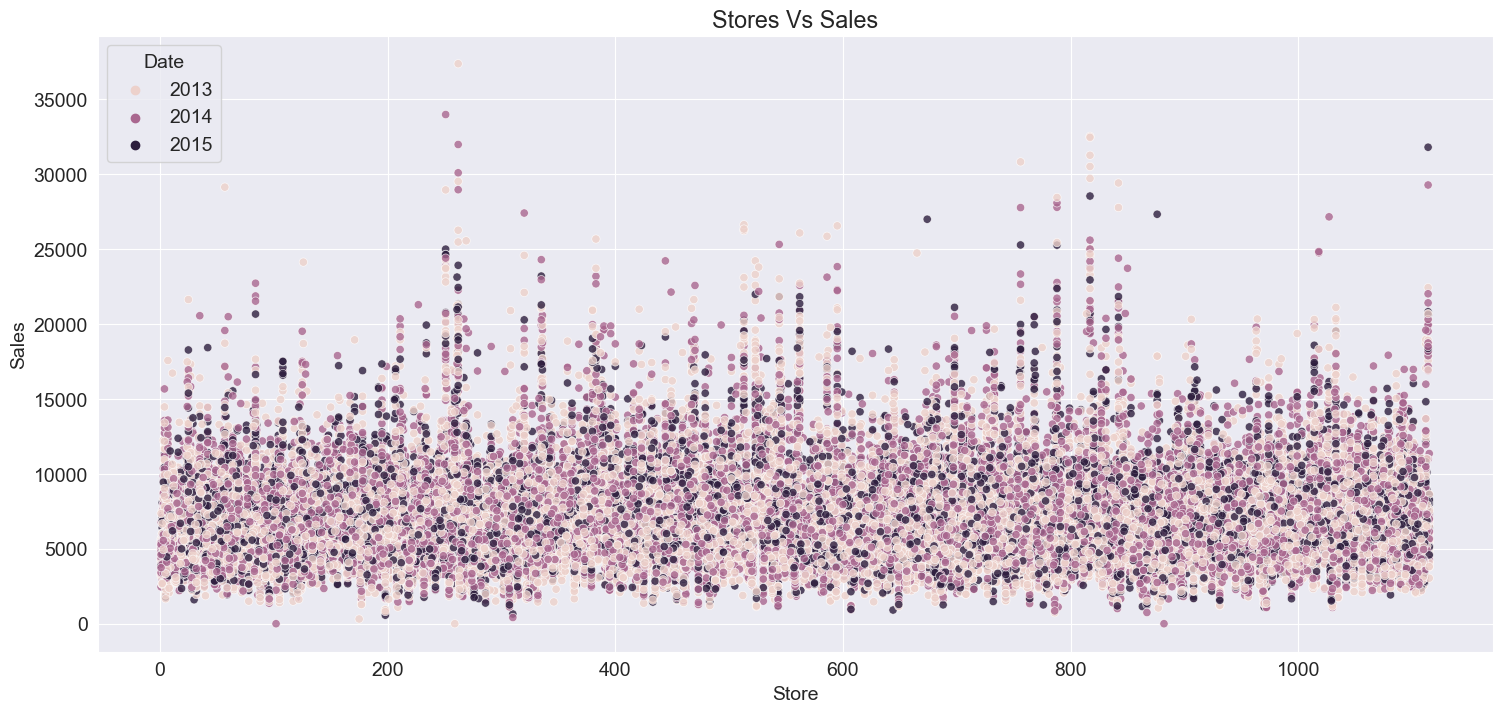

In [18]:
plt.figure(figsize=(18,8))
temp_df = merged_train_data.sample(50000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

Conclusions made are:

- We have around 1200 stores and for each stores we have just plotted the sales based on a paticular days.

- It is really noisy because there are thousands of stores, but each vertical line will represent a store. 

- The sales may fluctuate based on a single store (it can be high as well as low) on a certain day.

- Even after this most stores have sales btw /$5K to /$12k.

- Note: I also plotting a barplot but it was taking too mcuh time maybe because of large amount of data.

##### Sales Vs Day of Week

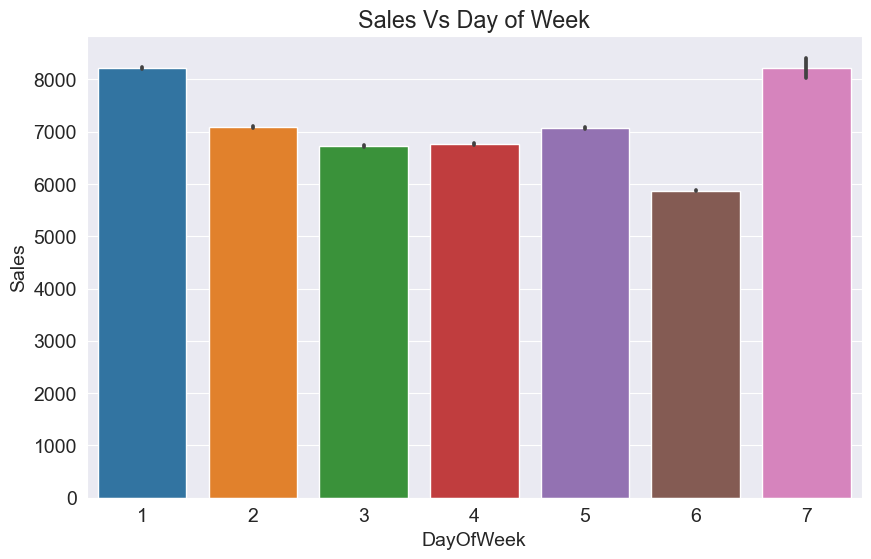

In [19]:
sns.barplot(data= merged_train_data, x = "DayOfWeek", y= "Sales")
plt.title("Sales Vs Day of Week")
plt.show()

Conclusions made are:

- Here, 7th and 1st day are Saturday and Sunday respectively, hence more sales is sensible.

- But why Friday has lower sales is doubtful.
 
- Other days are doing good so no problem there.

##### Sales Vs Promo Day

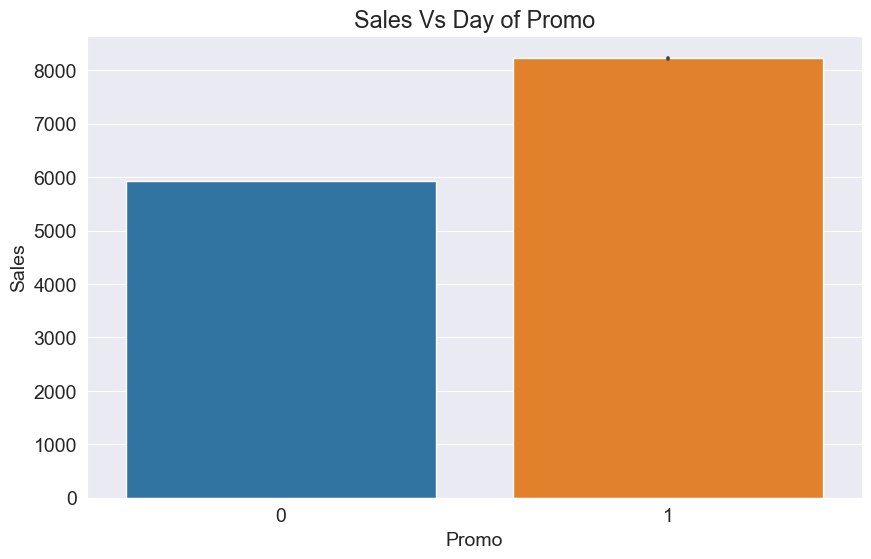

In [20]:
sns.barplot(data=merged_train_data, x='Promo', y='Sales')
plt.title("Sales Vs Day of Promo")
plt.show()

Conclusions made are:

- Promotion seems to be an important factor of "Sales". As sales is higher on promotion day and vice versa.

- There is almost 20% increase in seals during the days of promotions.

In [21]:
merged_train_data["Promo"].unique()

array([1, 0], dtype=int64)

In [22]:
merged_train_data['Promo'] = np.where(merged_train_data.Promo == 1,"a","b")
merged_train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,a,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,a,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,a,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,a,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,a,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,b,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,b,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,b,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,b,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
merged_train_data["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [24]:
# Create a mapping dictionary for day names
day_mapping = {
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat",
    7: "Sun"
}

# Replace numerical values with day names
merged_train_data["DayOfWeek"] = merged_train_data["DayOfWeek"].replace(day_mapping)

In [25]:
merged_train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Fri,2015-07-31,5263,555,1,a,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,Fri,2015-07-31,6064,625,1,a,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,Fri,2015-07-31,8314,821,1,a,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,Fri,2015-07-31,13995,1498,1,a,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,Fri,2015-07-31,4822,559,1,a,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,Tue,2013-01-01,3375,566,1,b,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,Tue,2013-01-01,10765,2377,1,b,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,Tue,2013-01-01,5035,1248,1,b,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,Tue,2013-01-01,4491,1039,1,b,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [26]:
merged_train_data["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [27]:
# Convert '0' values to int
# merged_train_data["StateHoliday"] = merged_train_data["StateHoliday"].replace('0', 0).astype(int)

# Replace 0 with a specific value, for example, 'NotHoliday'
replacement_value = 'NotHoliday'
merged_train_data["StateHoliday"] = merged_train_data["StateHoliday"].replace('0', replacement_value)
merged_train_data["StateHoliday"] = merged_train_data["StateHoliday"].replace(0, replacement_value)


# Verify the changes
print(merged_train_data["StateHoliday"].unique())

['NotHoliday' 'a' 'b' 'c']


In [28]:
merged_train_data["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [29]:
merged_train_data["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

In [30]:
merged_test_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [31]:
merged_test_data["Promo"].unique()

array([1, 0], dtype=int64)

In [32]:
merged_test_data['Promo'] = np.where(merged_test_data.Promo == 1,"a","b")
merged_test_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.0,a,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.0,a,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.0,a,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.0,a,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.0,a,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,1.0,b,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,1112,6,2015-08-01,1.0,b,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,1113,6,2015-08-01,1.0,b,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,1114,6,2015-08-01,1.0,b,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [33]:
merged_test_data["DayOfWeek"].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [34]:
# Create a mapping dictionary for day names
day_mapping = {
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat",
    7: "Sun"
}

# Replace numerical values with day names
merged_test_data["DayOfWeek"] = merged_test_data["DayOfWeek"].replace(day_mapping)

In [35]:
merged_test_data["StateHoliday"].unique()

array(['0', 'a'], dtype=object)

In [36]:
# Convert '0' values to int
# merged_train_data["StateHoliday"] = merged_train_data["StateHoliday"].replace('0', 0).astype(int)

# Replace 0 with a specific value, for example, 'NotHoliday'
replacement_value = 'NotHoliday'
merged_test_data["StateHoliday"] = merged_test_data["StateHoliday"].replace('0', replacement_value)

# Verify the changes
print(merged_test_data["StateHoliday"].unique())

['NotHoliday' 'a']


In [37]:
merged_test_data["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [38]:
merged_test_data["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


In [39]:
merged_train_data['Day'] = merged_train_data.Date.dt.day
merged_train_data['Month'] = merged_train_data.Date.dt.month
merged_train_data['Year'] = merged_train_data.Date.dt.year

In [40]:
merged_test_data['Day'] = merged_test_data.Date.dt.day
merged_test_data['Month'] = merged_test_data.Date.dt.month
merged_test_data['Year'] = merged_test_data.Date.dt.year

#### Sales Per Year

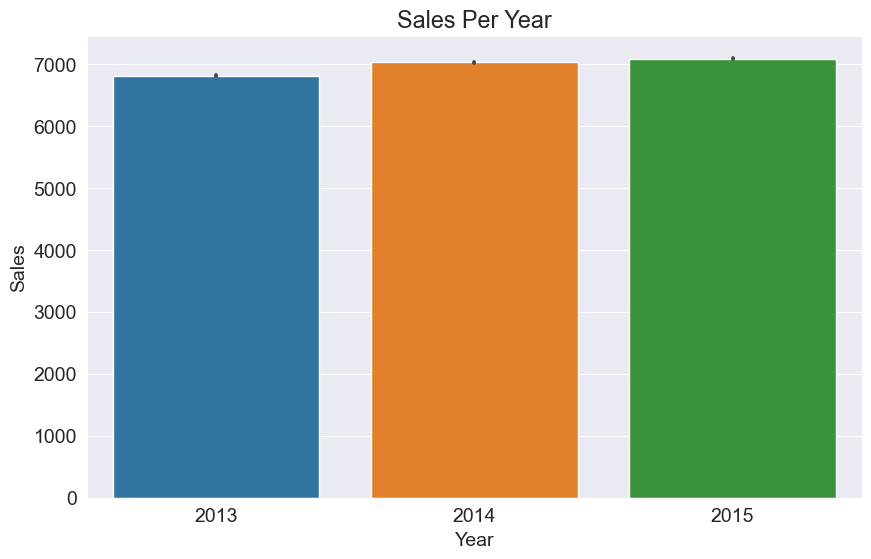

In [41]:
sns.barplot(data=merged_train_data, x='Year', y='Sales')
plt.title("Sales Per Year")
plt.show()

Conclusions made are:

- Our sales is increasing Year by Year. This can be said because we have only 7 months data for 2015 but in those 7 months only er have almost same sales as last year.

- This is a good news fro our sales.

##### Sales Per Month

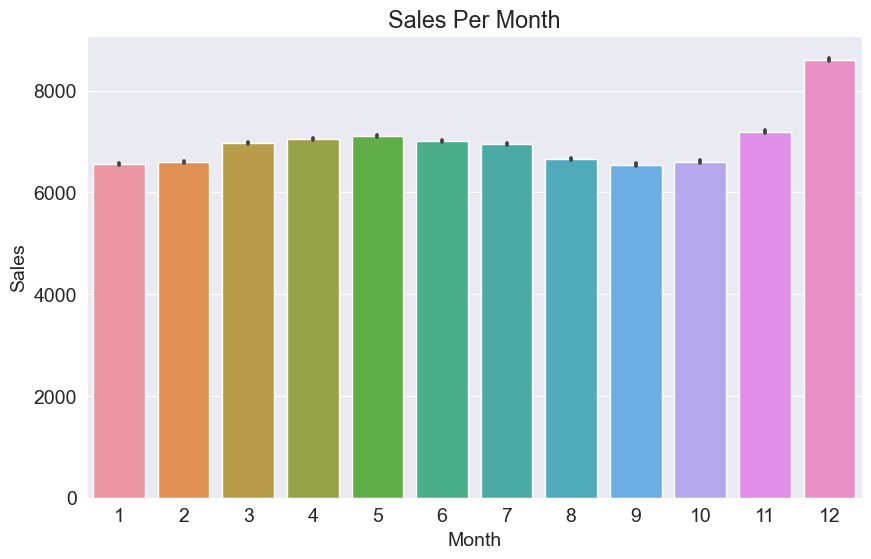

In [42]:
sns.barplot(data=merged_train_data, x='Month', y='Sales')
plt.title("Sales Per Month")
plt.show()

Conclusions made are:

- We have highest sales in the month of "December". May be because of festival season promos, etc.

- For other months we have fluctuating/ unstable graph, which is difficult to predict sales.

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [43]:
# Here I find the length of the merged train data
len(merged_train_data)

844392

In [44]:
# Here I find out the 75% of train data
train_size = int(0.75 * len(merged_train_data))
train_size

633294

In [45]:
# Sorting the train merged data based on "Date"
sorted_data = merged_train_data.sort_values("Date")

# Dividing the dataset into train as well as validation data
train_df, val_df = sorted_data[:train_size], sorted_data[train_size:]

In [46]:
# Just checking the correct timeline of train data
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [47]:
# Similarly Checking the timeline of test data if it is correct or not
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [48]:
# Ler's Check the Columns
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [49]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [50]:
target_col = "Sales"

Let's also separate out numeric and categorical columns.

In [51]:
merged_train_data[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [52]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [53]:
train_inputs["StateHoliday"].unique()

array(['a', 'NotHoliday', 'b', 'c'], dtype=object)

In [54]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [55]:
test_inputs = merged_test_data[input_cols].copy()
# Test data does not have targets

Note that some columns can be treated as both numeric and categorical, and it's up to you to decide how you want to deal with them.

In [56]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [57]:
categorical_cols

['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [58]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
1017190,1097,Tue,b,a,b,b,1,1,2013
1016179,85,Tue,b,a,b,a,1,1,2013
1016353,259,Tue,b,a,b,b,1,1,2013
1016356,262,Tue,b,a,b,a,1,1,2013
1016368,274,Tue,b,a,b,b,1,1,2013
...,...,...,...,...,...,...,...,...,...
256632,745,Wed,b,NotHoliday,a,a,10,12,2014
256642,756,Wed,b,NotHoliday,a,c,10,12,2014
256634,747,Wed,b,NotHoliday,c,c,10,12,2014
256633,746,Wed,b,NotHoliday,d,c,10,12,2014


### Imputation, Scaling and Encode

Let's impute missing data from numeric columns.

In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [60]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Note: We can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

Let's also scale the values to the $(0, 1)$ range.

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [62]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [63]:
train_inputs.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType',
       'Assortment', 'Day', 'Month', 'Year'],
      dtype='object')

In [64]:
train_inputs[numeric_cols]

,Store,Day,Month,Year
1017190,0.983842,0.0,0.0,0.0
1016179,0.075404,0.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0
1016356,0.234291,0.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0
...,...,...,...,...
256632,0.667864,0.3,1.0,1.0
256642,0.677738,0.3,1.0,1.0
256634,0.669659,0.3,1.0,1.0
256633,0.668761,0.3,1.0,1.0


In [65]:
train_inputs[categorical_cols]

,DayOfWeek,Promo,StateHoliday,StoreType,Assortment
1017190,Tue,b,a,b,b
1016179,Tue,b,a,b,a
1016353,Tue,b,a,b,b
1016356,Tue,b,a,b,a
1016368,Tue,b,a,b,b
...,...,...,...,...,...
256632,Wed,b,NotHoliday,a,a
256642,Wed,b,NotHoliday,a,c
256634,Wed,b,NotHoliday,c,c
256633,Wed,b,NotHoliday,d,c


Finally, let's encode categorical columns as one-hot vectors.

In [66]:
# dummy_data = pd.get_dummies(train_inputs[['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']]
# )
# dummy_data.head()

In [67]:
train_inputs[categorical_cols].nunique()

DayOfWeek       7
Promo           2
StateHoliday    4
StoreType       4
Assortment      3
dtype: int64

In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [69]:
# train_inputs[encoded_cols] = pd.get_dummies(train_inputs[['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']])
# val_inputs[encoded_cols] = pd.get_dummies(val_inputs[['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']])
# test_inputs[encoded_cols]  = pd.get_dummies(test_inputs[['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']])

In [70]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Explore the `scikit-learn` preprocessing module: https://scikit-learn.org/stable/modules/preprocessing.html

Let's now extract out the numeric data.

In [71]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [72]:
def return_mean(inputs):
    return np.full(len(inputs), merged_train_data.Sales.mean())

In [73]:
train_preds = return_mean(X_train)
train_preds


array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate this to using the RMSE score.

In [74]:
from sklearn.metrics import mean_squared_error
print("Train RMSE:", (mean_squared_error(train_preds, train_targets, squared=False)))
print("Validation RMSE:", (mean_squared_error(return_mean(X_val), val_targets, squared=False)))


Train RMSE: 3082.450443277419
Validation RMSE: 3168.6033635047716


The model is off by about $3000 on average.


Let's try another model.
### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

The we have fit the model, the model can now be used to make predictions. Note that the parameters of the model will not be updated during prediction.

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

In [76]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

In [77]:
print("LinearRegression RMSE:", (try_model(LinearRegression())))
print("Ridge RMSE:", (try_model(Ridge())))
print("Lasso RMSE:", (try_model(Lasso())))
print("ElasticNet RMSE:", (try_model(ElasticNet())))
print("SGDRegressor RMSE:", (try_model(SGDRegressor())))

LinearRegression RMSE: (2741.6151564591687, 2818.6208020481854)
Ridge RMSE: (2741.5871950814444, 2817.7784665409863)
Lasso RMSE: (2741.7143904423046, 2817.947292467132)
ElasticNet RMSE: (2879.0432606713075, 2972.665944772612)
SGDRegressor RMSE: (2741.735781029862, 2819.2298960871985)


### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [78]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1595.937191783755)

Seems like the decision tree performs much better than linear models.

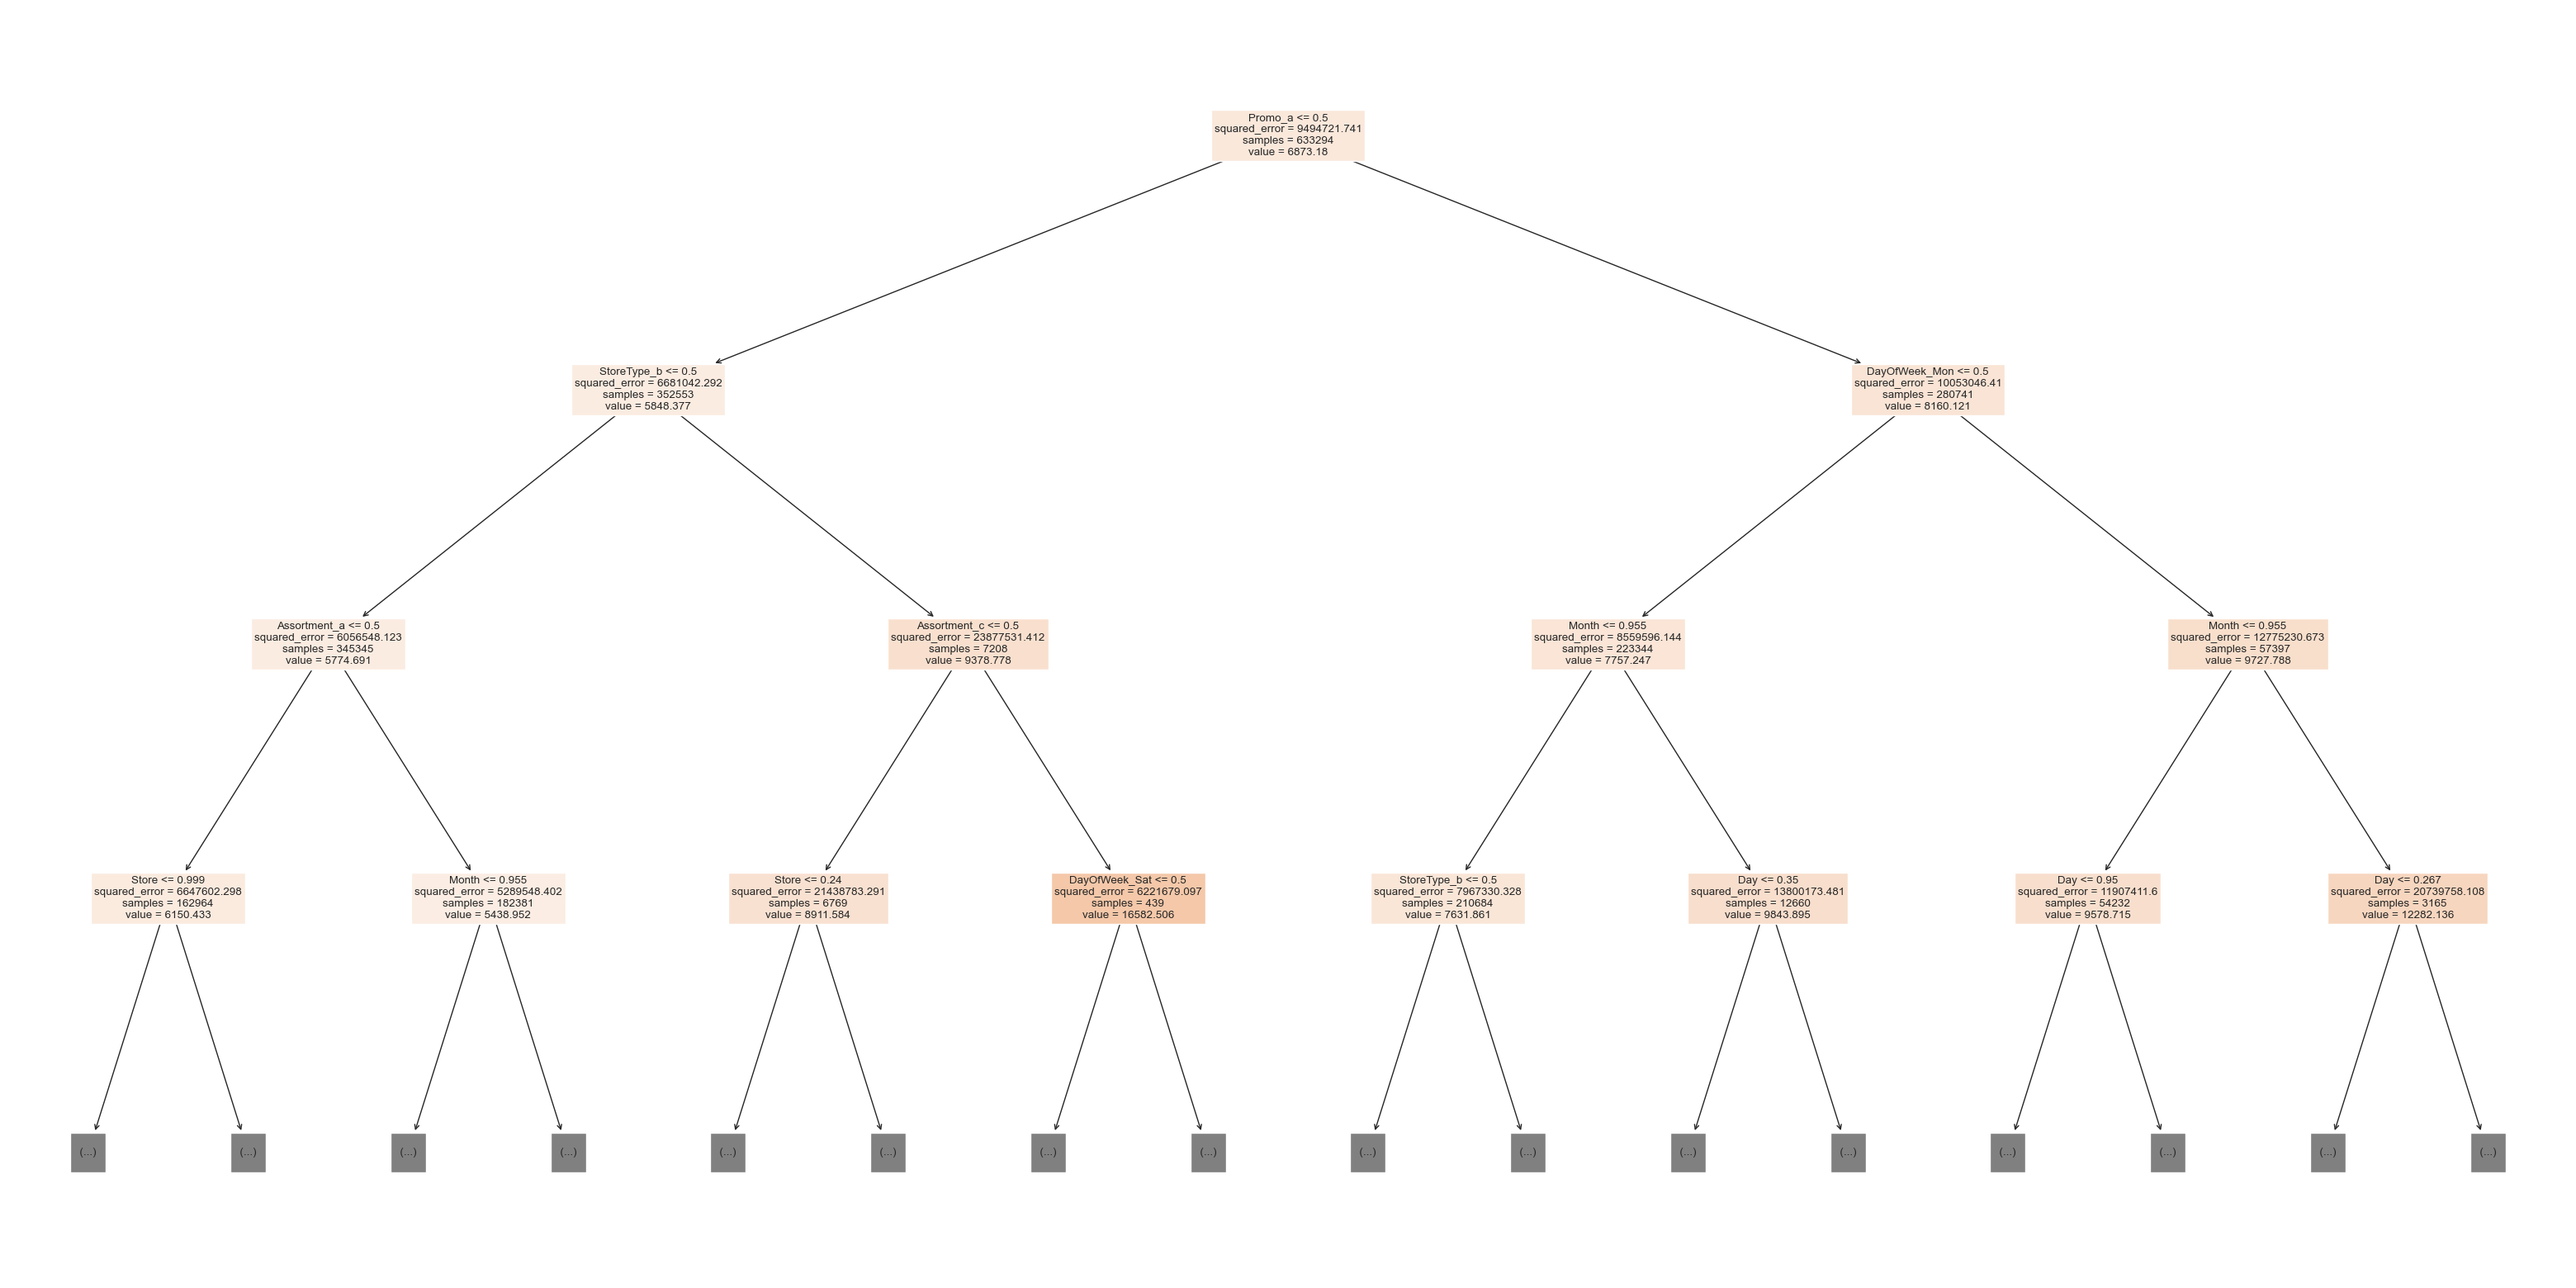

In [79]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Let's try a random forest.

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

(474.9717676695841, 1373.0408412415534)

We've seen a significant reduction in the loss by using a random forest. 

In [81]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_Fri', 'DayOfWeek_Mon',
       'DayOfWeek_Sat', 'DayOfWeek_Sun', 'DayOfWeek_Thu', 'DayOfWeek_Tue',
       'DayOfWeek_Wed', 'Promo_a', 'Promo_b', 'StateHoliday_NotHoliday',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [82]:
rf.feature_importances_

array([6.07350959e-01, 4.87951725e-02, 4.71301094e-02, 9.31018950e-03,
       5.72984192e-03, 3.37101547e-02, 6.95913381e-03, 4.48987960e-03,
       2.10148773e-03, 4.41149287e-03, 2.43822222e-03, 5.83469269e-02,
       8.05201285e-02, 1.18016192e-03, 2.15525999e-04, 2.67800094e-05,
       1.69783400e-05, 1.43204832e-02, 2.25658314e-02, 1.05710188e-02,
       1.34606293e-02, 8.38114262e-03, 5.53511672e-03, 1.24326325e-02])

In [83]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607351
12,Promo_b,0.080520
11,Promo_a,0.058347
1,Day,0.048795
2,Month,0.047130
5,DayOfWeek_Mon,0.033710
18,StoreType_b,0.022566
17,StoreType_a,0.014320
20,StoreType_d,0.013461
23,Assortment_c,0.012433


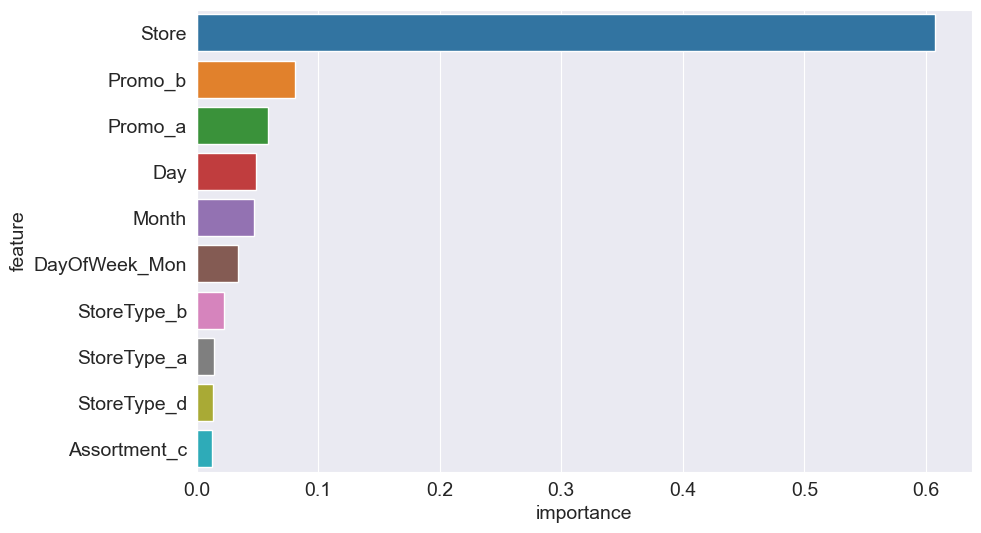

In [84]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.

In [85]:
test_preds = rf.predict(X_test)
test_preds

array([ 4242.32,  7690.13,  8785.78, ...,  5949.99, 20806.66,  6751.59])

Generating scores on the test set.